**Loading Data**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dimikara/Survival-Prediction-of-Patients-with-Heart-Failure/master/heart_failure_clinical_records_dataset.csv")
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
print(data.shape)
data.info()

(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# 1/ Implement Logistic Regression from scratch

**Visualizing Data**

In [6]:
#Select all features
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis = 1)

features = list(X)

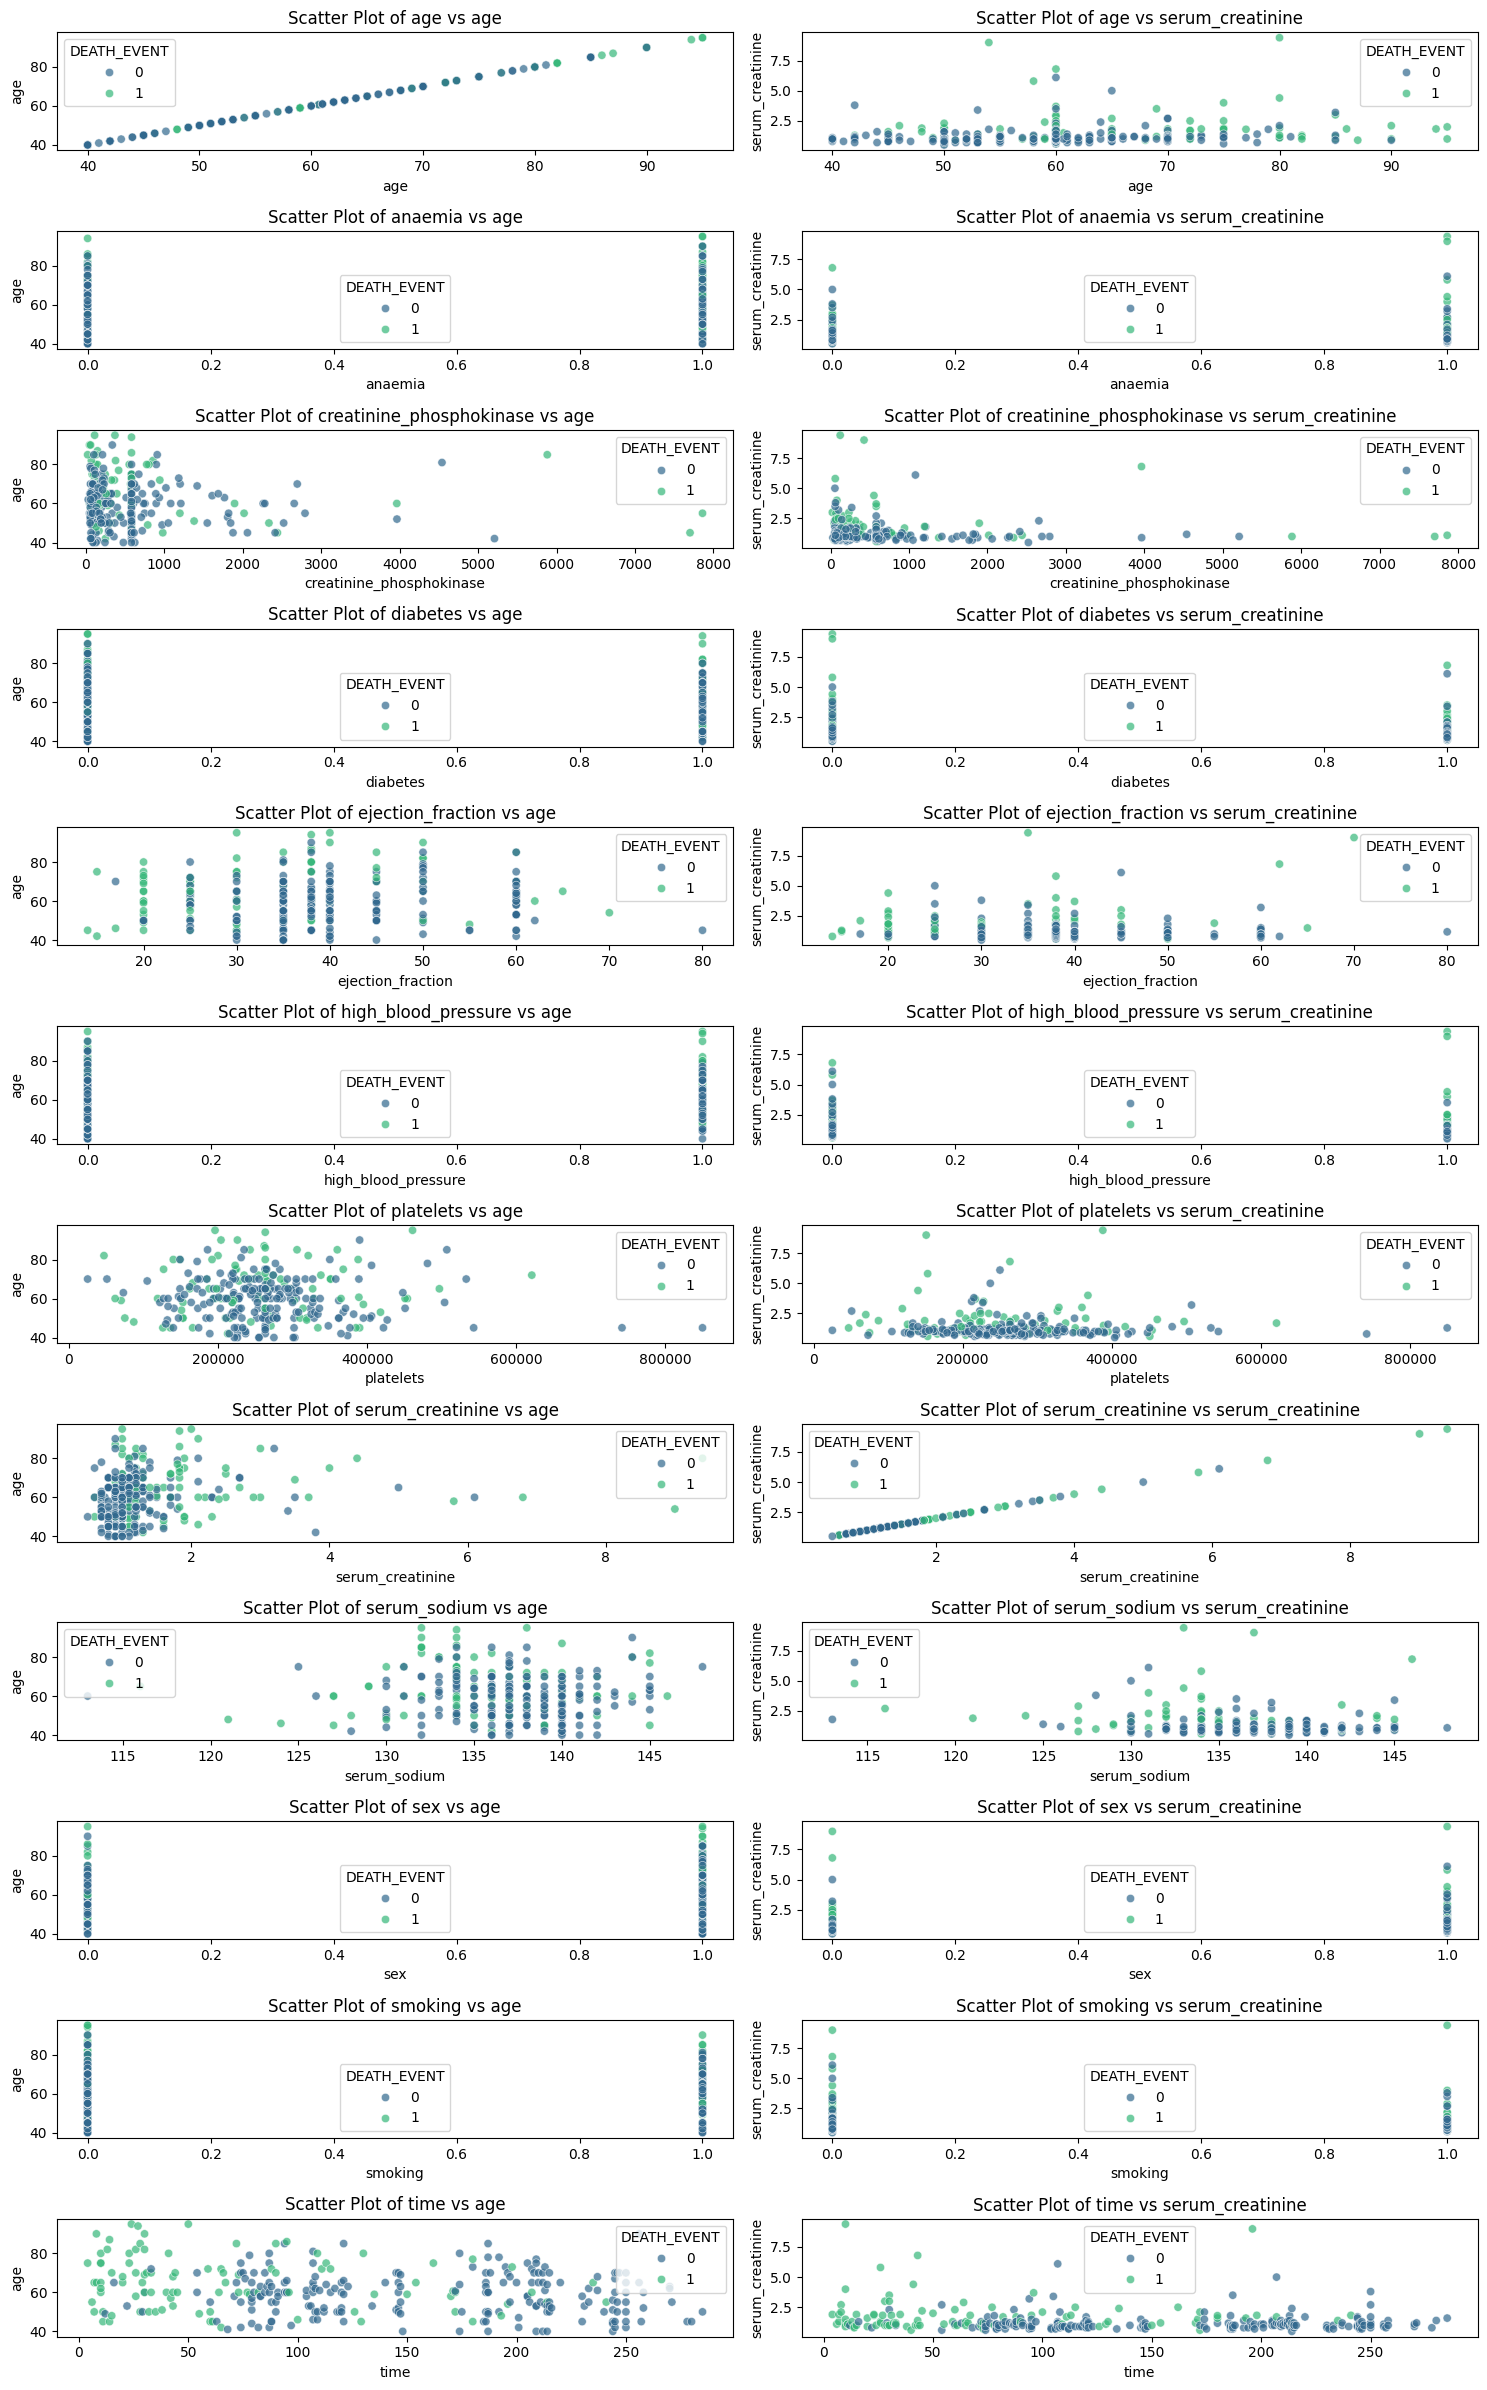

In [7]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, 2 * len(features)))
# Plot scatter plots for each feature against 'DEATH_EVENT'
for i, feature in enumerate(X):
  # Scatter plot for feature vs 'DEATH_EVENT' (0)
  sns.scatterplot(x=feature, y='age', hue='DEATH_EVENT', data=data, ax=axes[i, 0], palette='viridis', alpha=0.7)

  axes[i, 0].set_title(f'Scatter Plot of {feature} vs age')
  axes[i, 0].set_xlabel(feature)
  axes[i, 0].set_ylabel('age')
  # Scatter plot for feature vs 'DEATH_EVENT' (1)
  sns.scatterplot(x=feature, y='serum_creatinine', hue='DEATH_EVENT', data=data, ax=axes[i, 1], palette='viridis', alpha=0.7)

  axes[i, 1].set_title(f'Scatter Plot of {feature} vs serum_creatinine')
  axes[i, 1].set_xlabel(feature)
  axes[i, 1].set_ylabel('serum_creatinine')
# Adjust layout
plt.tight_layout()
plt.show()

**Scaling Features**

In [8]:
def zscore_normalize_features(X):
  #Find the mean of each features
  mu = np.mean(X, axis = 0)
  #Find standard deviation of each features
  sigma = np.std(X, axis = 0)
  #Calculate X after normalization
  X_norm = (X - mu)/sigma

  return X_norm

In [9]:
X_norm = zscore_normalize_features(X)
X_norm.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


**Prepair Data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

**Sigmoid Function**

In [12]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

**Cost Function**

In [13]:
def compute_cost_regularized(X, y, w, b, lambda_ = 1):
  m,n = X.shape
  cost_without_reg = 0.
  reg = 0.
  total_cost = 0.

  #Compute cost without reg
  for i in range(m):
    z_wb = np.dot(X[i], w) + b
    f_wb = sigmoid(z_wb)

    cost_without_reg += (-y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb))
  cost_without_reg /= m

  #Compute reg
  for j in range(n):
    reg += w[j]**2
  reg *= lambda_ / (2*m)

  total_cost = reg + cost_without_reg
  return total_cost

**Gradient**

In [14]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1):
  m,n = X.shape
  dj_dw = np.zeros(w.shape)
  dj_db = 0

  for i in range(m):
    z_wb = 0
    for j in range(n):
      z_wb = X[i,j] * w[j]
    z_wb += b
    f_wb = sigmoid(z_wb)

    dj_db += (f_wb - y[i])
    for j in range(n):
      dj_dw[j] += ((f_wb -y[i])*X[i,j] + (lambda_*w[j]))

  dj_db /= m
  dj_dw /= m
  return dj_dw, dj_db

**Gradient Descent**

In [15]:
def gradient_descent(X, y, w_in, b_in, compute_cost_regularized, compute_gradient_reg, alpha, num_iters, lambda_):
  #Number of training examples
  m = len(X)

  #Save J(cost) and w each iterations
  J = []
  w = []

  for i in range(num_iters):
    #Calculate gradient
    dj_dw, dj_db = compute_gradient_reg(X, y, w_in, b_in, lambda_)

    #Update parameters
    w_in = w_in - alpha*dj_dw
    b_in = b_in - alpha*dj_db

    # Save cost J at each iteration
    if i<100000:      # prevent resource exhaustion
      cost =  compute_cost_regularized(X, y, w_in, b_in, lambda_)
      J.append(cost)

    # Print cost every at intervals 10 times or as many iterations if < 10
    if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
      w.append(w_in)
      print(f"Iteration {i:4}: Cost {float(J[-1]):8.2f}   ")
  return w_in, b_in, J, w #return w and J,w history for graphing

**Training model**

In [16]:
#Settings
np.random.seed(1)
initial_w = np.random.rand(X_train.shape[1])-0.5
initial_b = 1.

lambda_ = 0.1
iterations = 10000
alpha = 0.0009

w,b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b,
                                    compute_cost_regularized, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     1.14   
Iteration 1000: Cost     0.88   
Iteration 2000: Cost     0.71   
Iteration 3000: Cost     0.61   
Iteration 4000: Cost     0.54   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.47   
Iteration 7000: Cost     0.45   
Iteration 8000: Cost     0.43   
Iteration 9000: Cost     0.42   
Iteration 9999: Cost     0.41   


**Predict on test set**

In [17]:
def predict(X, w, b):
  m,n = X.shape
  p = np.zeros(m)

  for i in range(m):
    z_wb = 0
    for j in range(n):
      z_wb = X[i,j] * w[j]
    z_wb += b
    f_wb = sigmoid(z_wb)

    #Apply threshold
    p[i] = 1 if f_wb >= 0.5 else 0
  return p

In [18]:
p = predict(X_test, w, b)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))

Test Accuracy: 73.333333


# 2/ Implement with sklearn

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
X_norm = zscore_normalize_features(X)
X_norm.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


**Prepair Data**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

**Train Model**

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Predict on test set**

In [23]:
y_predict = model.predict(X_test)

#Evaluate accuracy score
accuracy_logistic = accuracy_score(y_test, y_predict)
print(f"Test Accuracy: {accuracy_logistic*100:.2f}")

Test Accuracy: 80.00
